(higher-order-odes-section)=
# Higher-order ODEs

The {prf:ref}`Euler method<euler-method-definition>` solves a first-order ODE of the form $y' = f(t, y)$ so what happens when we want to solve a higher order ODE? The solution is we write a higher order ODE as system of first-order ODEs and apply the Euler method to each of these equations. For example consider the $N$-th order ODE

$$ y^{(N)} = f(t, y, y', y'' ,\ldots ,y^{(N-1)}). $$

If we introduce functions $y_1, y_2, \ldots, y_N$[^1] where $y_1=y$, $y_2 =y'$, $y_3 =y''$ and so on then

[^1]: The functions $y_1, y_2, \ldots$ are ODEs and should not be confused for the solution values $y_1=y(t_1), y_2=y(t_2), \ldots$. 

$$ \begin{align*}
    y_1' &= y_2,\\
    y_2' &= y_3,\\
    &\vdots \\
    y_N' &= f(t, y_1 , y_2 , y_3 , \ldots, y_N).
\end{align*} $$

This is a system of $N$ first-order ODEs so we can apply the Euler method to each equation in the system to give an equivalent solution to the $n$th order ODE.

::::{prf:example}
:label: higher-order-odes-example

Rewrite the following ODE as a system of first-order ODEs

$$ y''' + yy'' -2y' + ty'' - 10 = 0. $$

:::{dropdown} Solution (click to show)

First rearrange the ODE so that the highest derivative is the subject

$$ y''' = -yy'' + 2y' - ty'' + 10, $$

then let $y_1 = y$, $y_2 = y'$, $y_3 = y''$ then we can rewrite this ODE as

$$ \begin{align*}
    y_1' &= y_2, \\
    y_2' &= y_3, \\
    y_3' &= - y_1 y_3 + 2 y_2 - t y_3 + 10. 
\end{align*} $$
:::
::::

(solving-systems-of-odes-section)=
## Solving systems of ordinary differential equations

We have seen that we can rewrite an $N$-th order ODE into a system of $N$ first-order ODEs and we can apply the Euler method to solve each one. Since we applying the same method to multiple equations it makes sense to group them for convenience. Consider a system of $N$ first-order ODEs

$$ \begin{align*}
    y_1' &= f_1(t, y_1, y_2, \ldots, y_N), \\
    y_2' &= f_2(t, y_1, y_2, \ldots, y_N), \\
    & \vdots \\
    y_n' &= f_n(t, y_1, y_2, \ldots, y_N).
\end{align*} $$

Let $\mathbf{y}$ and $\mathbf{f}(t, \mathbf{y})$ be the vectors

$$ \begin{align*}
    \mathbf{y} &= \begin{pmatrix} y_1  \\ y_2  \\ \vdots \\ y_N \end{pmatrix}, &
    \mathbf{f}(t, \mathbf{y}) &= \begin{pmatrix} f_1(t, \mathbf{y}) \\ f_2(t, \mathbf{y}) \\ \vdots \\ f_n(t, \mathbf{y}) \end{pmatrix},
\end{align*} $$

then we can write the system in vector form

$$ \begin{align*}
    \mathbf{y}' = \mathbf{f}(t, \mathbf{y}).
\end{align*} $$

The Euler method so solving a system of first-order ODEs is

$$ \begin{align*}
    \mathbf{y}_{n+1} &= \mathbf{y}_n + h \mathbf{f}(t_n, \mathbf{y}_n).
\end{align*} $$

Where we have an initial value problem that is defined using a system of ODEs we need to know the initial value for each equation in the system, i.e., $y_1(t_0), y_2(t_0), \ldots$. The solution is an $n \times N$ matrix $Y$ where the rows are formed from the solutions for $\mathbf{y}_n$, i.e.,

$$ \begin{align*}
    Y = 
    \begin{pmatrix}
        \leftarrow & \textbf{y}_0 & \rightarrow \\
        \leftarrow & \textbf{y}_1 & \rightarrow \\
        & \vdots \\
        \leftarrow & \textbf{y}_n & \rightarrow
    \end{pmatrix}
\end{align*} $$

:::::{prf:example}
:label: system-odes-example

The <a href="https://en.wikipedia.org/wiki/Van_der_Pol_oscillator" target="_blank">van der Pol equation</a> is a model of a non-conservative oscillator with non-linear damping which is

$$ \ddot{y} - \mu (1 - y^2) \dot{y} + y = 0, $$

where $y$ is the position of the oscillator, $\mu$ a parameter for the strength of the dampening and $\dot{y}$ and $\ddot{y}$ are the first and second-order derivatives with respect to time $t$.

Use the Euler method to calculate the solution to the van der Pol equation with $\mu=1$ over the domain $t \in [0, 20]$ with initial conditions $y(0)=2$ and $\dot{y}(0)=0$ using a step length of $h=0.1$. 

::::{dropdown} Solution (click to show)

First we need to write the ODE as a system of two first-order ODEs. Let $y_1=y$ and $y_2=\dot{y}$ then

$$\begin{align*}
    \dot{y}_1 &= y_2, \\
    \dot{y}_2 &= \mu (1 - y_1^2) y_2 - y_1,
\end{align*} $$

which can be written in vector form as

$$\begin{align*}
    \mathbf{y} &= \begin{pmatrix} y_1 \\  y_2 \end{pmatrix}, &
    \mathbf{f}(t, \mathbf{y}) &= 
    \begin{pmatrix} y_2 \\ \mu (1 - y_1^2) y_2 - y_1 \end{pmatrix}.
\end{align*} $$

The initial conditions are $y(0) = 2$ and $\dot{y}(0) = 0$ so $\mathbf{y}_0 = \begin{pmatrix} 2 , 0 \end{pmatrix}$. The values of $t$ are

$$ \mathbf{t} = \begin{pmatrix} 0.0 \\ 0.1 \\ 0.2 \\ \vdots \\ 19.9 \\ 20.0 \end{pmatrix}.$$

Calculating the first few steps of the Euler method with $\mu=1$ and $h=0.1$

$$ \begin{align*}
    \mathbf{y}_1 &= \mathbf{y}_0 + h \mathbf{f}(t_0, \mathbf{y}_0) \\
    &= \begin{pmatrix} 2 \\ 0 \end{pmatrix} + 0.1
    \begin{pmatrix} 0  \\ 1(1 - 2^2)(0) - 2 \end{pmatrix} 
    = \begin{pmatrix} 2 \\ -0.2 \end{pmatrix}, \\
    \mathbf{y}_2 &= \mathbf{y}_1 + h \mathbf{f}(t_1, \mathbf{y}_1) \\
    &= \begin{pmatrix} 2  \\ -0.2 \end{pmatrix} + 0.1
    \begin{pmatrix} -0.2 \\ 1(1 - 2^2)(-0.2) - 2 \end{pmatrix} 
    = \begin{pmatrix} 1.98 \\ -0.34 \end{pmatrix}, \\
    \mathbf{y}_3 &= \mathbf{y}_2 + h \mathbf{f}(t_2, \mathbf{y}_2) \\
    &= \begin{pmatrix} 1.98 \\ -0.34 \end{pmatrix} + 0.1
    \begin{pmatrix} -0.34 \\ 1(1 - 1.98^2)(-0.34) - 1.98 \end{pmatrix} 
    = \begin{pmatrix} 1.946 \\ -0.348706 \end{pmatrix},  \\
    &\vdots
\end{align*} $$

Continuing for the whole domain we get

$$ Y = \begin{pmatrix}
    2 & -0.2 \\
    1.98 & -0.34 \\
    \vdots & \vdots \\
    -0.828052 & 1.314658 \\
    -0.696586 & 1.438787
\end{pmatrix}. $$

The first column of $Y$ is the solution $y$ for the van der Pol equation which has been plotted in {numref}`system-odes-plot`

:::{glue:figure} system_odes_plot
:name: system-odes-plot
:figwidth: 600

Solution to the van der Pol equation with $y(0)=2$ and $\mu=1$ using the Euler method.
:::

::::

::::::

## Code

The code used to compute the solutions to {prf:ref}`system-odes-example` is shown below (this assumes the functions [`solveIVP()`](euler-code-section) and [`euler()`](euler-code-section) have already been defined). Note that the `y0` array and the values returned by the `f()` function are $1 \times 2$ arrays where the number of columns is the same as the number of equations in the system of ODEs.

:::::{tab-set}
::::{tab-item} Python
```python
# Define ODE function (van der Pol equation)
def f(t,y):
    return np.array([ y[1], mu* (1 - y[0] ** 2) * y[1] - y[0] ])

# Define IVP parameters
tspan = [0, 20]  # boundaries of the t domain
y0 = [2, 0]      # initial values
h = 0.1          # step length
mu = 1           # dampening parameter

# Solve the IVP using the Euler method
t, y = solveIVP(f, tspan, y0, h, euler)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b-")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.show()
```
::::

::::{tab-item} MATLAB
```matlab
% Define ODE function (van der Pol equation)
f = @(t, y, mu) [ y(2), mu * (1 - y(1) ^ 2) * y(2) - y(1) ];

% Define IVP parameters
tspan = [0, 20];    % boundaries of the t domain
y0 = [2, 0];        % initial values
h = 0.1;            % step length
mu = 1;             % dampening parameter

% Solve the IVP using the Euler method
[t, y] = solveIVP(@(t,y)f(t, y, mu), tspan, y0, h, @euler);

% Plot solution
plot(t, y(:, 1), 'b', LineWidth=2)
xlabel('$t$', Fontsize=14, Interpreter='latex')
ylabel('$y$', Fontsize=14, Interpreter='latex')
axis padded
```
::::
:::::

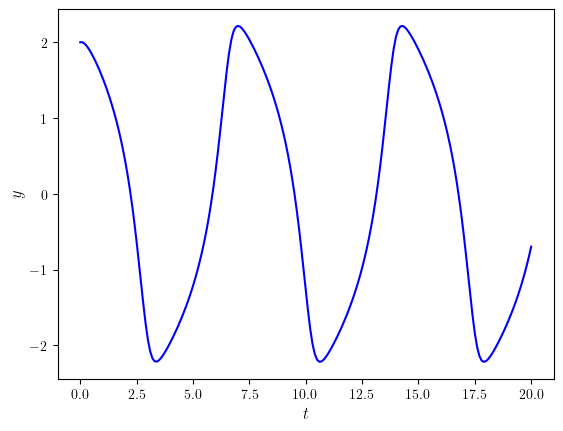

[[ 2.          0.        ]
 [ 2.         -0.2       ]
 [ 1.98       -0.34      ]
 [ 1.946      -0.4387064 ]
 [ 1.90212936 -0.51104261]
 [ 1.8510251  -0.56745968]
 [ 1.79427913 -0.61487979]
 [ 1.73279115 -0.65783897]
 [ 1.66700725 -0.69938155]
 [ 1.5970691  -0.74166837]
 [ 1.52290226 -0.78636998]
 [ 1.44426527 -0.83491981]
 [ 1.36077328 -0.88868222]
 [ 1.27190506 -0.94907013]
 [ 1.17699805 -1.01763254]
 [ 1.07523479 -1.09612048]
 [ 0.96562275 -1.18653025]
 [ 0.84696972 -1.29111023]
 [ 0.7178587  -1.41229944]
 [ 0.57662875 -1.55253648]
 [ 0.42137511 -1.71383105]
 [ 0.249992   -1.8969214 ]
 [ 0.06029986 -2.09975774]
 [-0.14967591 -2.31500002]
 [-0.38117591 -2.52634616]
 [-0.63381053 -2.70415662]
 [-0.90422619 -2.80256099]
 [-1.18448229 -2.76325007]
 [-1.4608073  -2.53344333]
 [-1.71415163 -2.10008078]
 [-1.92415971 -1.52160364]
 [-2.07632007 -0.91799093]
 [-2.16811917 -0.40640248]
 [-2.20875941 -0.03919155]
 [-2.21267857  0.1968853 ]
 [-2.19299004  0.3414477 ]
 [-2.15884527  0.43068226]
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # use LaTeX commands in plot

# Euler method function
def euler(f, t, y, h): 
    return y + h * f(t, y)


# IVP solver function
def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
              
    return t, y


# Define ODE function (van der Pol equation)
def f(t,y):
    return np.array([ y[1], mu* (1 - y[0] ** 2) * y[1] - y[0] ])

# Define IVP parameters
tspan = [0, 20]  # boundaries of the t domain
y0 = [2, 0]      # initial values
h = 0.1          # step length
mu = 1           # dampening parameter

# Solve the IVP using the Euler method
t, y = solveIVP(f, tspan, y0, h, euler)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b-")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.show()

print(y)

from myst_nb import glue
glue("system_odes_plot", fig, display=False)